In [1]:
import rerun as rr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
import scipy
%matplotlib inline

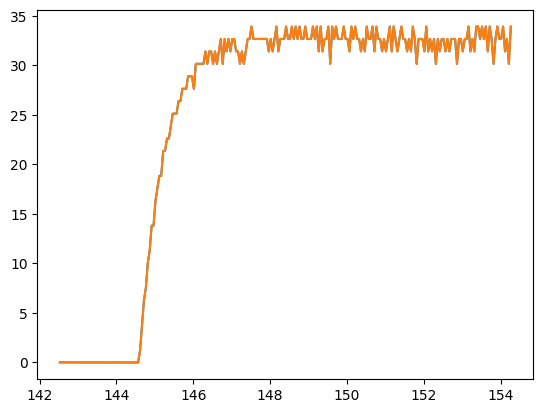

In [4]:

path_to_rrd = "./step_response.rrd"
recording = rr.dataframe.load_recording(path_to_rrd)
batches = recording.view(index="sample_time", contents="/**").select()
df: pd.DataFrame = batches.read_pandas()

Fs = 100
# df = df[df['sample_time'] > pd.to_timedelta(0.5*1e9)]
# df = df[df['sample_time'] < pd.to_timedelta(10*1e9)]
ts = df['sample_time'].to_numpy().astype(np.float64) / 1e9

abs_vel = np.concatenate(df['/abs_wheel_velocity:Scalar'].to_numpy())
vel = np.concatenate(df['/wheel_velocity:Scalar'].to_numpy())
control = np.concatenate(df['/control:Scalar'].to_numpy())


# plt.plot(ts, control)
plt.plot(ts, abs_vel)
plt.plot(ts, vel)


329.99999508261686


TransferFunction(array([22.74928236]), array([ 1.        , -0.93106278]), 0.04999999999999995)

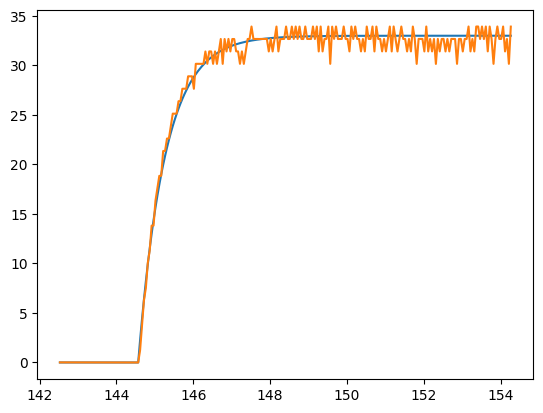

In [3]:


Ts = np.mean(ts[2:] - ts[1:-1])
K = 33/control[-1]
T = 0.7
Gmotor = ct.tf([K], [T, 1], inputs=['r'], outputs=['y'])
Gmotord = ct.c2d(Gmotor, Ts)
print(K)
resp = ct.forced_response(Gmotord, U=control)
plt.plot(ts, resp.y[0])
plt.plot(ts, vel)
Gmotord